In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
PATH = "girls_msk_data.csv"
dataset = pd.read_csv(PATH)
dataset.head()

,age,name,breasts_size,weight,height,sex_tags,district_of_work,price_per_hour,price_per_2h,price_per_night
0,21,Дарья,3,55,180,"['Индивидуалка', 'МБР', 'Эскорт', 'Целуюсь', '...","['Москва', 'Хорошёвский']",15000.0,30000.0,75000.0
1,19,Эмма,2,63,168,"['Диспетчер', 'МБР', 'Эскорт', 'Целуюсь', 'Апа...","['Москва', 'Отрадное']",11000.0,22000.0,65000.0
2,23,Ника,3,75,185,"['Индивидуалка', 'МБР', 'Целуюсь', 'GFE', 'Выс...","['Москва', 'Тёплый Стан']",8000.0,16000.0,45000.0
3,18,Милана,1,45,163,"['Индивидуалка', 'МБР', 'Целуюсь', 'Апартамент...","['Москва', 'Савёловский']",10000.0,20000.0,60000.0
4,21,Alina vanilla,3,52,170,"['Индивидуалка', 'Анальный секс', 'МБР', 'Эско...","['Москва', 'Пресненский']",20000.0,40000.0,120000.0


In [113]:
dataset = dataset[["age", "breasts_size", "weight", "height", "price_per_hour"]]
dataset.head()

,age,breasts_size,weight,height,price_per_hour
0,21,3,55,180,15000.0
1,19,2,63,168,11000.0
2,23,3,75,185,8000.0
3,18,1,45,163,10000.0
4,21,3,52,170,20000.0


In [114]:
dataset = dataset[dataset['breasts_size'] <= 4]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1206 entries, 0 to 1261
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1206 non-null   int64  
 1   breasts_size    1206 non-null   int64  
 2   weight          1206 non-null   int64  
 3   height          1206 non-null   int64  
 4   price_per_hour  1206 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 56.5 KB


In [129]:
import numpy as np
import pandas as pd

class KMeans:
    def __init__(self, n_clusters, max_iters=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.cluster_centers_ = None
        self.inertia_ = None
        self.labels_ = None
        
    def fit(self, X):
        X = X.to_numpy()
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        n_samples, n_features = X.shape
        idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.cluster_centers_ = X[idx]
        
        for _ in range(self.max_iters):
            distances = self._calculate_distances(X)
            labels = np.argmin(distances, axis=1)
            
            new_centers = np.array([X[labels == k].mean(axis=0) 
                                  for k in range(self.n_clusters)])
            
            if np.all(self.cluster_centers_ == new_centers):
                break
                
            self.cluster_centers_ = new_centers
            
        distances = self._calculate_distances(X)
        self.labels_ = np.argmin(distances, axis=1)
        self.inertia_ = np.sum(np.min(distances, axis=1))
        
        return self
    
    def fit_predict(self, X):
        self.fit(X)
        return self.labels_
    
    def _calculate_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.sum((X - self.cluster_centers_[k]) ** 2, axis=1)
        return distances

Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

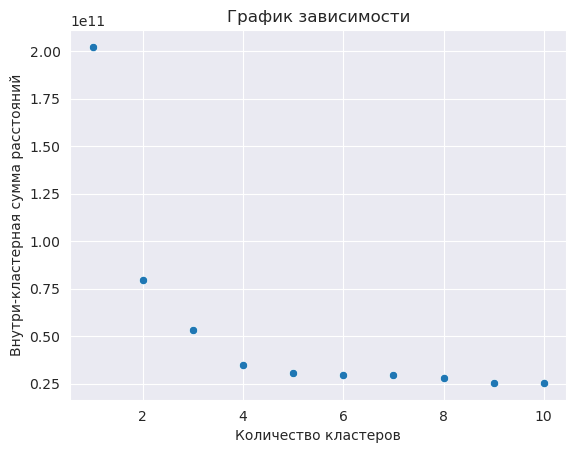

In [130]:
X = dataset.drop("breasts_size", axis=1)
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

sns.set_style('darkgrid')

sns.scatterplot(
    x=[x for x in range(1, 11)],
    y=inertia,
)

plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')

In [131]:
CLUSTERS = 4

model = KMeans(n_clusters=CLUSTERS, random_state=42)
model.fit(dataset.drop("breasts_size", axis=1))

clusters = pd.DataFrame(
    columns=dataset.columns.drop("breasts_size"),
    data=model.cluster_centers_
)
clusters["Amount"] = np.unique(
    model.labels_,
    return_counts=True
)[1]

clusters

,age,weight,height,price_per_hour,Amount
0,24.421995,53.575448,167.994885,24956.521739,391
1,24.320197,54.192118,167.642857,14671.182266,406
2,24.895522,54.246269,166.134328,8608.208955,268
3,22.843972,51.432624,168.695035,48156.028369,141
